In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
%store -r

In [3]:
sensors = list(dataframes.keys())

In [4]:
for i, sensor in enumerate(sensors):
    if sensor == 'widely_whole_tarpon':
        print(i)

14


In [5]:
for sensor in sensors:
    #print(sensor)
    #print(dataframes[sensor].shape[0])
    dataframes[sensor].dropna(inplace=True)
    #print(dataframes[sensor].shape[0])

In [13]:
sns.set(rc = {'figure.figsize':(18,9)})
%config InlineBackend.figure_format = 'retina'

In [6]:
failing_detail = {}
missing = {}

for i in range(len(sensors)):
    df = dataframes[sensors[i]]
    # Convert the 'time' column to datetime format (if it's not already)
    df['time'] = pd.to_datetime(df['time'])

    # Sort the DataFrame by the 'time' column
    df.sort_values('time', inplace=True)

    # Calculate the time difference between consecutive rows
    time_diff = df['time'].diff()

    # Find the indexes where the time difference is greater than one hour (3600 seconds)
    missing_indexes = time_diff[time_diff >= pd.Timedelta(hours=1)].index

    missing[sensors[i]] = missing_indexes

    num = len(missing_indexes)

    # maintaining recored of failure for analysis
    failing_detail[sensors[i]] = num

In [7]:
missing

{'light_maroon_penguin': Int64Index([], dtype='int64'),
 'useless_crimson_rook': Int64Index([], dtype='int64'),
 'closed_wagon_snail': Int64Index([], dtype='int64'),
 'handsome_violet_leech': Int64Index([97990, 97994, 98010, 98051, 98115, 98182, 98235, 98459, 98460,
             98462, 98484],
            dtype='int64'),
 'easily_dear_mouse': Int64Index([16288, 17722], dtype='int64'),
 'daily_ace_bear': Int64Index([], dtype='int64'),
 'bored_blue_fish': Int64Index([   15,   390,   413,   580,   612,   633,   654,   657,   685,
               694,
             ...
              8452,  8455,  8527,  8559,  8571,  8572,  8578, 10449, 10457,
             10808],
            dtype='int64', length=142),
 'highly_master_pony': Int64Index([], dtype='int64'),
 'boring_olive_stingray': Int64Index([], dtype='int64'),
 'lonely_quiet_bear': Int64Index([], dtype='int64'),
 'likely-well-thrush': Int64Index([], dtype='int64'),
 'barely_hot_aphid': Int64Index([], dtype='int64'),
 'mildly_calm_ibex': In

In [11]:
def agg_func(x):
    df = x.to_frame()
    #print(df)
    for i in range(df.shape[0]-1):
        if df['f_cnt'][i] > df['f_cnt'][i+1]:
            ##print('true')
            return None
            #return (x.count())/( 2 + (df['f_cnt'][i]-df['f_cnt'][0])+(df['f_cnt'][-1]-df['f_cnt'][i+1]))
    return (x.count())/((x.max() - x.min())+1)    

In [9]:
sensors[14]

'widely_whole_tarpon'

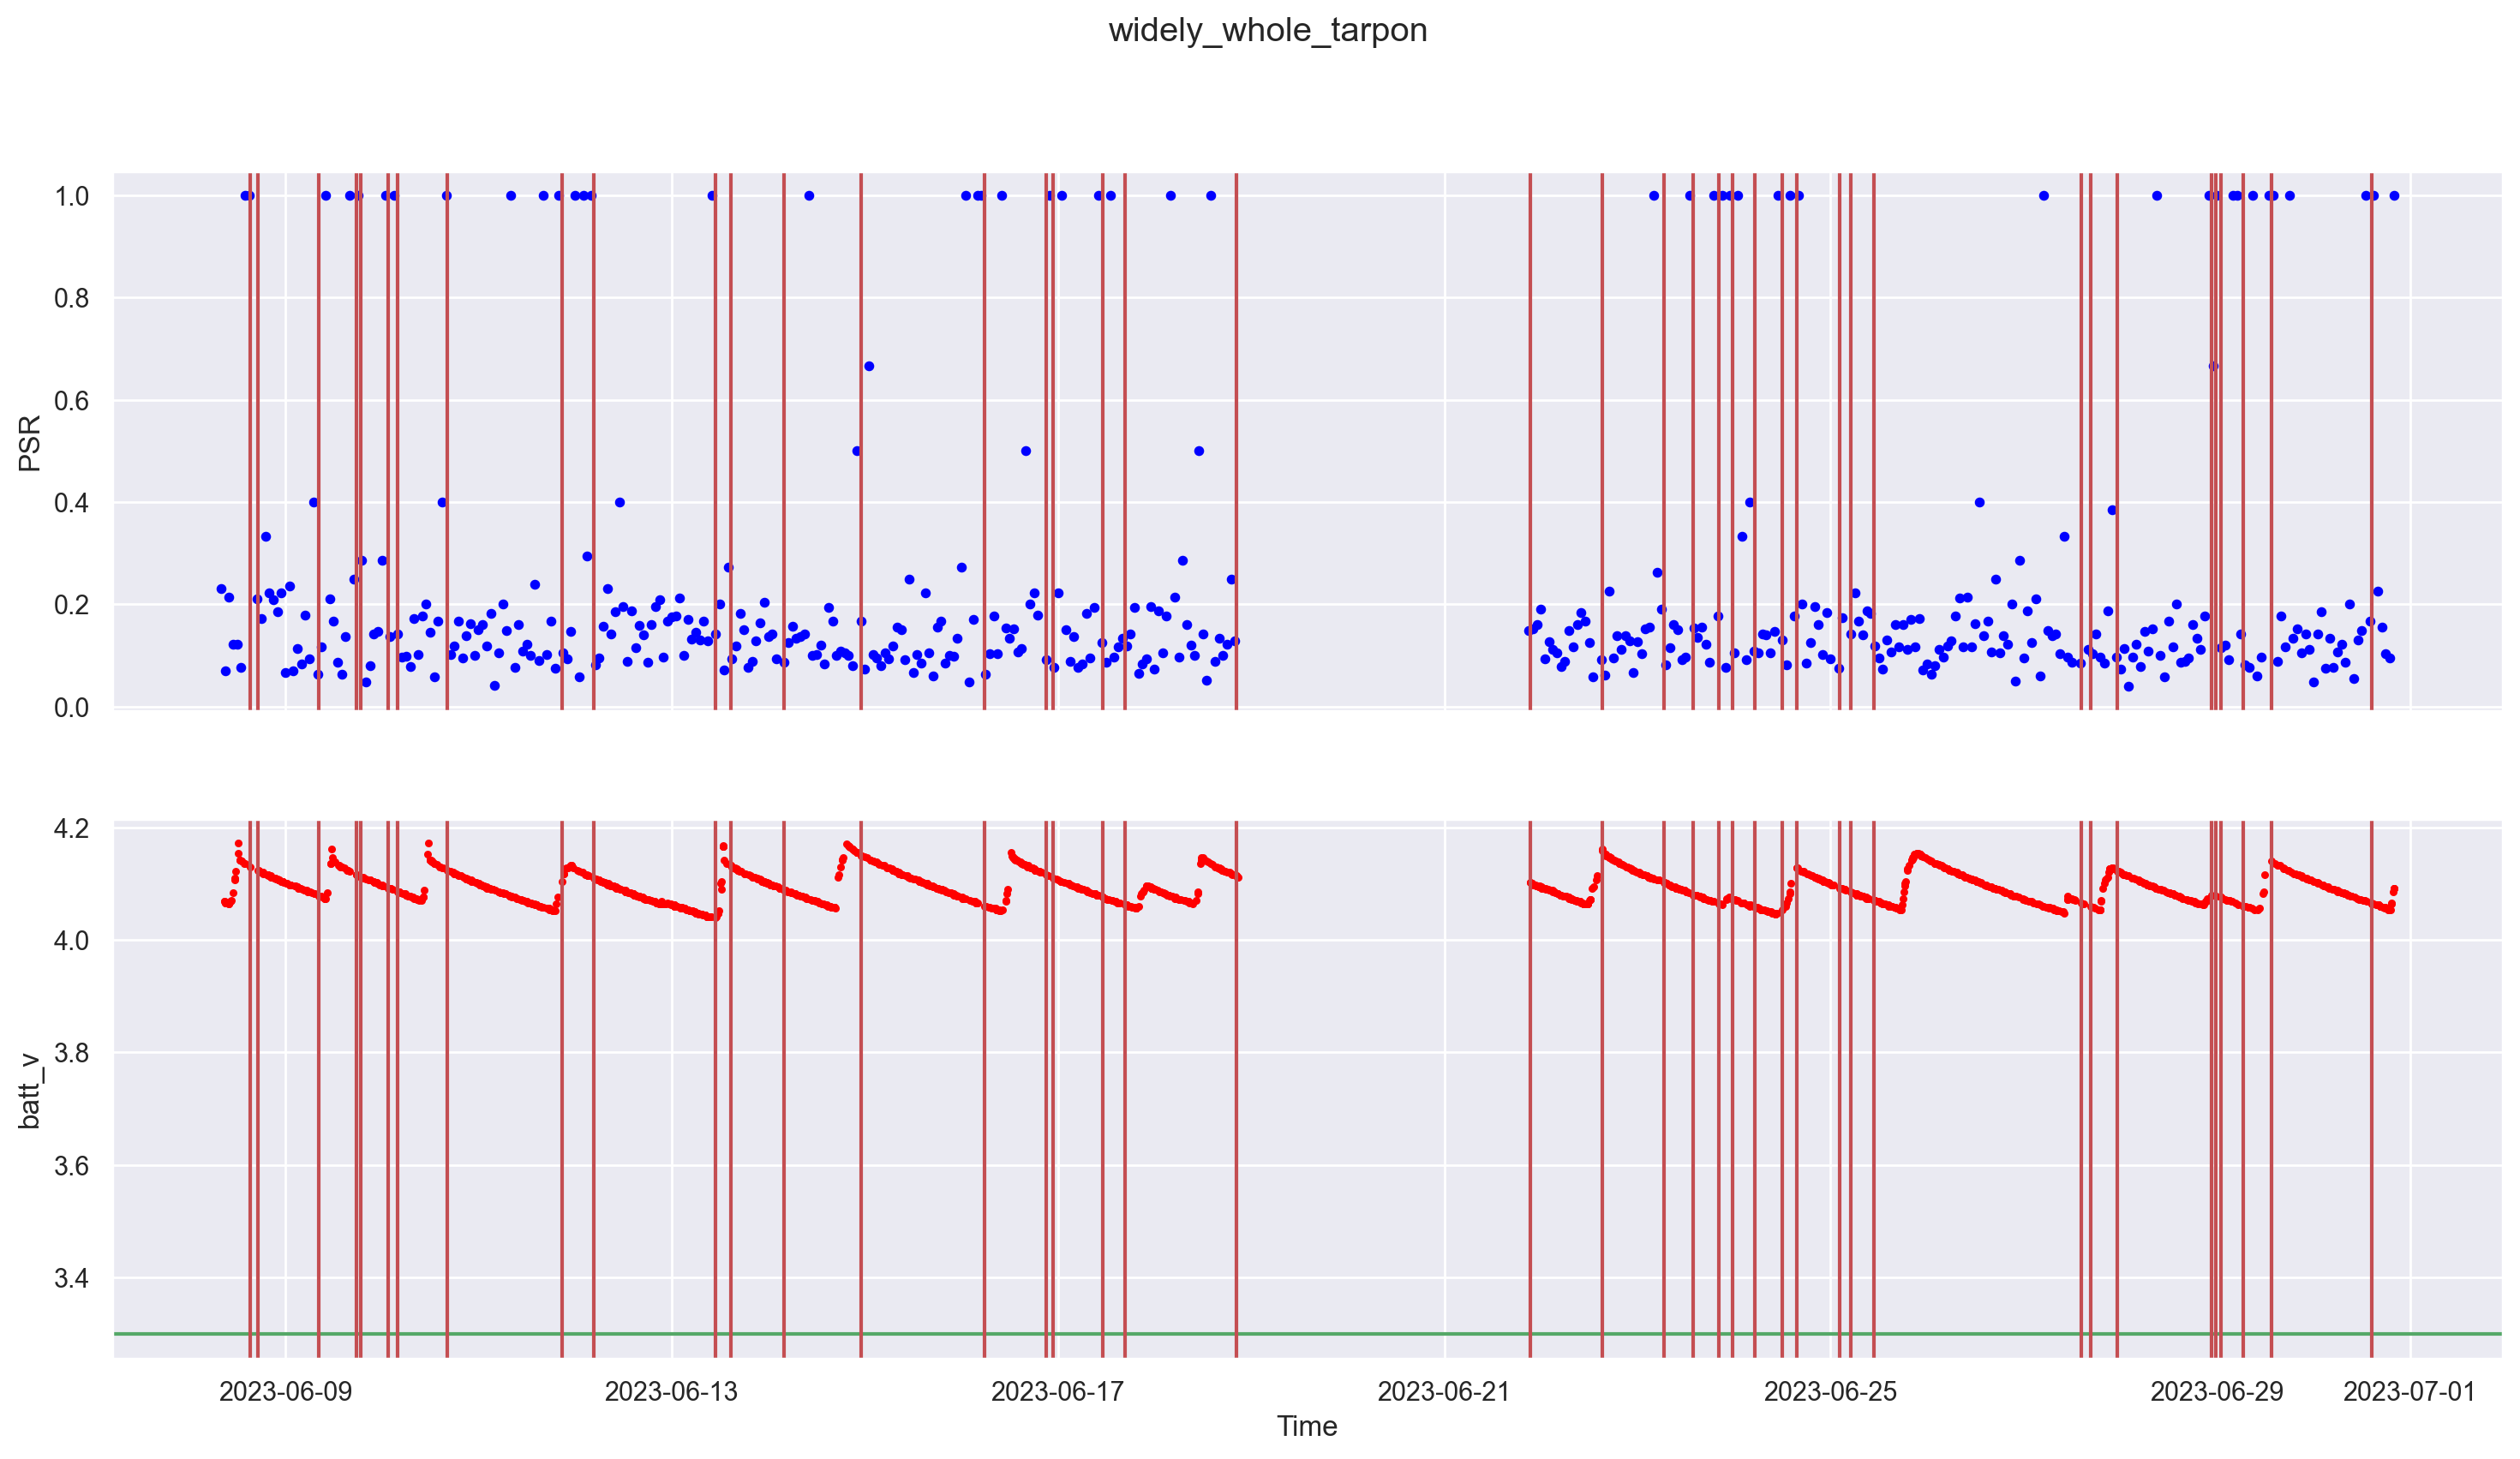

In [15]:
for i, sensor in enumerate([sensors[14]]):
    df = dataframes[sensor]
    df['time'] = pd.to_datetime(df['time'])

    # figuring out subplot
    #plt.subplot(3,1, i+1)

    fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True)
    fig.suptitle(sensor)

    # PSR
    #hourly_average = df.set_index('time')['f_cnt'].resample('1H').agg({'PSR': lambda x: (x.count()/((x.max() - x.min())+1))})
    
    hourly_average = df.set_index('time')['f_cnt'].resample('1H').agg(func=agg_func)
    psr_data = pd.DataFrame(hourly_average)
    psr_data = psr_data.reset_index(drop=False)
    psr_data = psr_data.rename(columns={'f_cnt': 'PSR'})
    ax1.scatter(psr_data['time'], psr_data['PSR'], s = 10, c = 'blue')
    plt.xlabel('Time')
    ax1.set_ylabel('PSR')

    # battery voltage
    ax2.scatter(df['time'], df['batt_v'], s = 5, c = 'red')
    ax2.axhline(y=3.3, color = 'g')
    ax2.set_ylabel('batt_v')

    # # rsi
    # ax3.scatter(df['time'], df['gw_1_rssi_dbm'], s = 5, c = 'green')
    # ax3.set_ylabel('rssi')
    # ax3.axhline(y=-40, color = 'r')
    # ax3.axhline(y=-110, color = 'r')

    failure_timestamp = list(df.loc[list(missing[sensor])]['time'])

    for time in failure_timestamp:
        ax1.axvline(x=time, color='r')
        ax3.axvline(x=time, color='r')
        ax2.axvline(x=time, color='r')
    
    ## Disables plot show
    plt.ioff()
    
    plot_name = 'plot_100/' + sensor + '.png'
    #plt.savefig(plot_name)
    plt.show()
    

In [16]:
xy = dataframes['lovely_helped_lamb']
xy = xy.drop(['times', 'date'], axis=1)
xy.dropna(inplace=True)

In [17]:
hourly_average = xy.set_index('time')['f_cnt'].resample('1H').agg(func=agg_func)
psr_data = pd.DataFrame(hourly_average)
psr_data[psr_data['f_cnt']>1]

,f_cnt
time,
2023-06-15 21:00:00+00:00,2.0


In [19]:
print(xy[4000:5000].to_string())

      Unnamed: 0                             time       deployment_id  error_flag  batt_v                            gw_1_id  dist_mm   f_cnt  gw_1_rssi_dbm  gw_1_snr_db
4122        4122 2023-06-15 19:02:14.975000+00:00  lovely_helped_lamb           0   4.126                         fngw-10000     9999     9.0           -105        -2.50
4123        4123 2023-06-15 19:03:18.176000+00:00  lovely_helped_lamb           0   4.126                         fngw-10000     9999    10.0           -108        -2.50
4124        4124 2023-06-15 19:07:30.774000+00:00  lovely_helped_lamb           0   4.126                        nyc-mocto-1     9999    14.0           -106         0.75
4125        4125 2023-06-15 19:10:40.943000+00:00  lovely_helped_lamb           0   4.126                         fngw-10000     9999    17.0           -105        -0.25
4126        4126 2023-06-15 19:27:21.359000+00:00  lovely_helped_lamb           0   4.118                        nyc-mocto-1     9999     4.0         